<a href="https://colab.research.google.com/github/dahmansphi/prediction_from_start_to_end/blob/main/book_3_LAB_code_part_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter Six- The rest of methods implementation

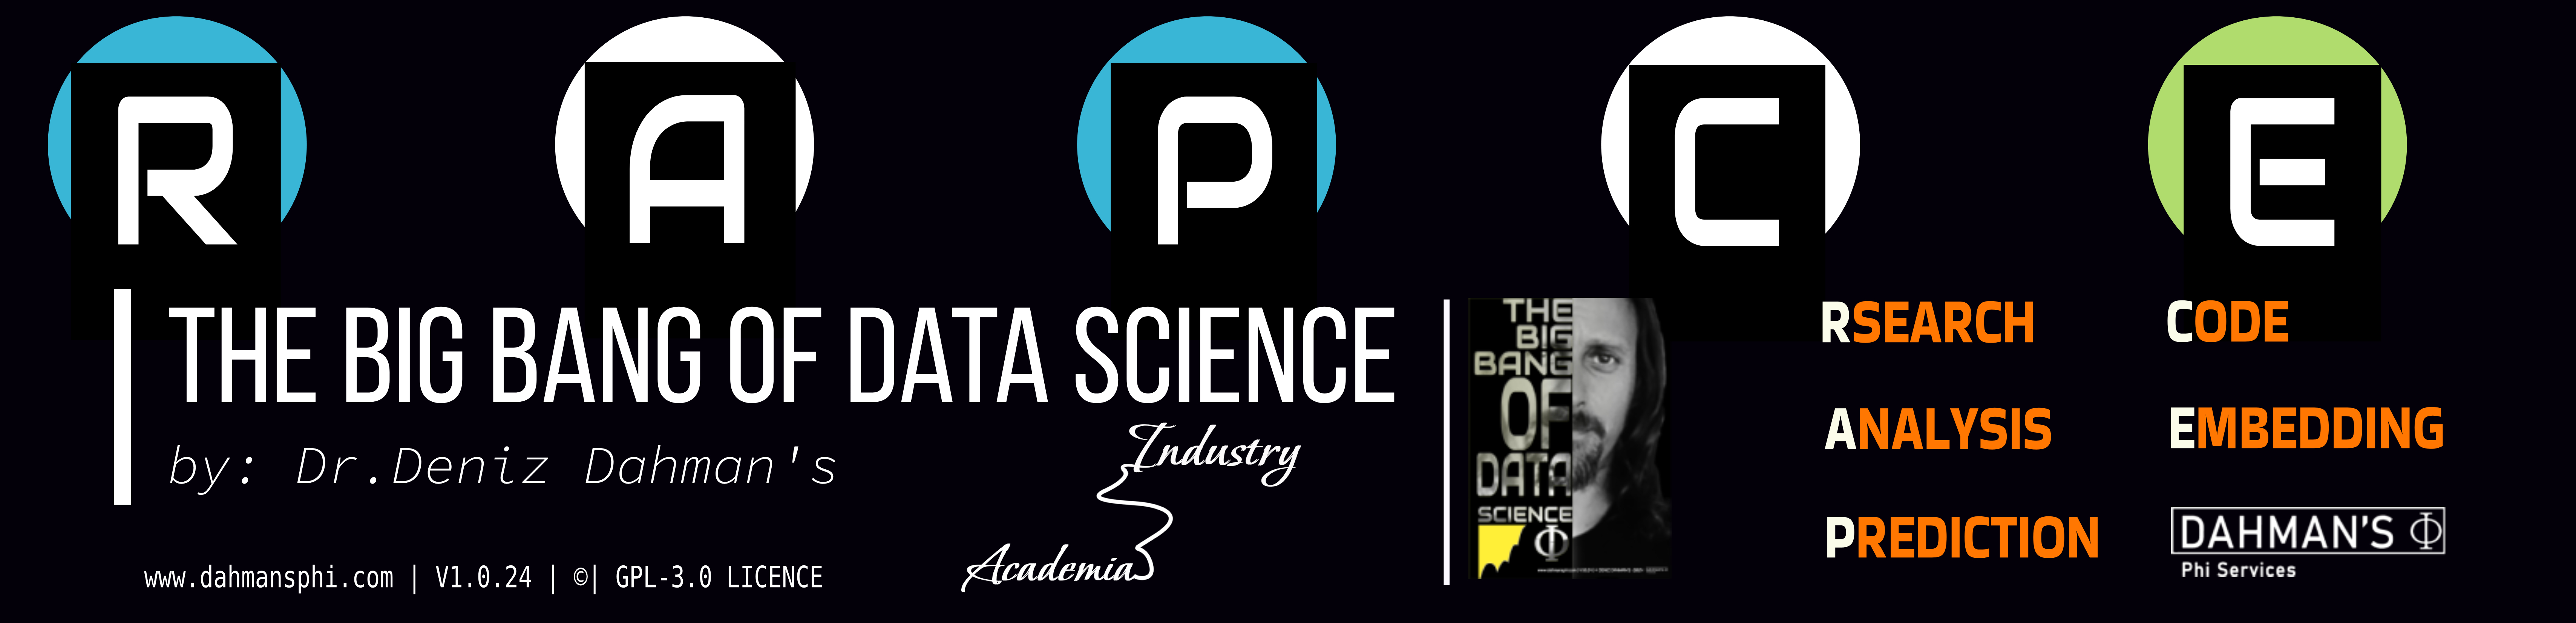

This Notebook contains **part two** the code implementation that is used during the recorded lectures. It is organized in titles for each cell. as you follow the recorded lecture you can view the code which the aurthor used to make the illustration. Please make sure to check the **[part one](https://github.com/dahmansphi/prediction_from_start_to_end/blob/main/lab/part_one/book_3_LAB_code_part_one.ipynb)** of this notebook

**[GPL-3.0 License](https://github.com/dahmansphi/analysis_from_start_to_end/blob/main/LICENSE.txt)**

# Main Libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import random

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
import seaborn as sns
sns.set_style("white")
from sklearn.datasets import load_iris
ds_fe = load_iris()

# DS Generator

In [4]:
# ******** Generate Fictitious ds
mat_skeleton = np.random.randint(14, size=(100, 2))
label = []
for i in mat_skeleton:
  val = (((0.01 * i[0])**2)+(0.3 * i[0]) +0.8 )
  if i[1] <= val:
    label.append([1])
  else:
    label.append([-1])
Y = np.array(label)
mat_skeleton = np.asmatrix(np.hstack((mat_skeleton, Y)))

In [5]:
mat_skeleton_att = np.random.randint(14, size=(100, 2))
label = []
for i in mat_skeleton_att:
  val = ((-0.5 * i[0])+10)
  if i[1] <= val:
    label.append([1])
  else:
    label.append([-1])
Y = np.array(label)
mat_skeleton_att = np.asmatrix(np.hstack((mat_skeleton_att, Y)))

In [6]:
mat_skeleton = np.concatenate((mat_skeleton, mat_skeleton_att), axis=0)

# Linear Classifier

In [7]:
# Data on file
path = '/content/drive/MyDrive/Colab Notebooks/npyfolder/mat_amend_1.npy'
# np.save(path,mat_skeleton)

In [8]:
mat = np.load(path)
mat

array([[ 2, 12, -1],
       [ 2, 10, -1],
       [ 1,  6, -1],
       [ 8,  6, -1],
       [ 3,  0,  1],
       [ 9,  9, -1],
       [ 4,  8, -1],
       [ 7,  7, -1],
       [12,  3, -1],
       [ 8,  3, -1],
       [11, 11, -1],
       [ 5,  6, -1],
       [ 5,  8, -1],
       [12, 12, -1],
       [ 0,  5,  1],
       [ 7, 10, -1],
       [11,  9, -1],
       [ 6, 11, -1],
       [ 7, 11, -1],
       [ 5,  2,  1],
       [ 2,  2,  1],
       [13,  1, -1],
       [ 0,  1,  1],
       [ 9, 13, -1],
       [13,  0, -1],
       [ 7, 13, -1],
       [ 9,  1,  1],
       [ 3,  2,  1],
       [ 5, 10, -1],
       [ 6,  6, -1],
       [ 5,  8, -1],
       [ 4,  0,  1],
       [ 8,  6, -1],
       [ 4,  0,  1],
       [13,  5, -1],
       [ 6,  1,  1],
       [ 4,  4, -1],
       [ 4, 11, -1],
       [ 5, 12, -1],
       [ 6,  5, -1],
       [10,  0,  1],
       [ 7,  2,  1],
       [ 7, 10, -1],
       [12,  4, -1],
       [ 6, 12, -1],
       [ 3,  2,  1],
       [13, 12, -1],
       [11, 1

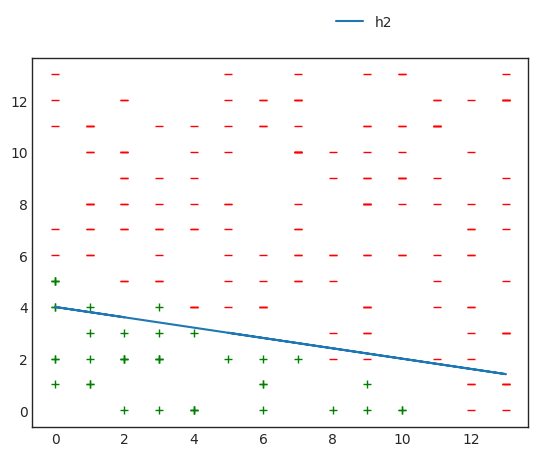

In [9]:
# ******** Graph that
pos = np.where(mat[:,2]==1)[0]
neg = np.where(mat[:,2]==-1)[0]

plt.plot(mat[pos,0], mat[pos,1], 'g+')
plt.plot(mat[neg,0], mat[neg,1], 'r_')
# plt.plot(mat[:,0], np.array((-0.5*mat[:,0]+6)), label ='h1')
plt.plot(mat[:,0], np.array((-0.2*mat[:,0]+4)), label ='h2')
# plt.legend(loc ="lower right")
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
plt.show()

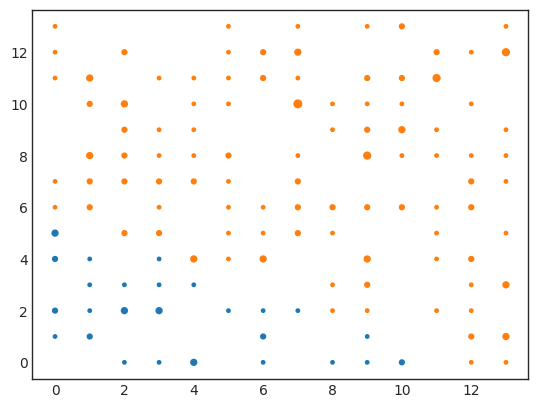

In [10]:
# *******other way to graph the same set looking at the density of data
x0_val = list(set(np.array(mat[:,0])))
x1_val = list(set(np.array(mat[:,1])))

x0, x1 = np.meshgrid(x0_val, x1_val)
x0e = np.hstack((x0_val, np.max(x0_val)+1))
x1e = np.hstack((x1_val, np.max(x1_val)+1))

yval = [1,-1]
color = ['g', 'r']

for j in yval:
  I = np.where(mat[:,2]==j)[0]
  cnt, x0e, x1e = np.histogram2d(mat[I,0], mat[I,1], [x0e, x1e])

  x0, x1 = np.meshgrid(x0_val, x1_val)
  plt.scatter(x1, x0, s=6*cnt)
# plt.legend(['positive', 'negative'], loc='upper right')

In [11]:
# ************** Model that learn the W vector from the data

# ******** prediction function
def predict(row, w):
  act = w[0]
  for i in range(len(row)-1):
    act += w[i+1] * row[i]
  return 1.0 if act >= 0.0 else -1.0

# ***** the SGD function to learn and update the W vector
def train_weights(train, l_rate, n_ep):
  print(len(train[0]))
  w = [0.0 for i in range(len(train[0]))]
  for ep in range(n_ep):
    sum_err = 0.0
    for row in train:
      pred = predict(row, w)
      err = row[-1] - pred
      sum_err += err **2
      w[0] = w[0] + l_rate * err
      for i in range(len(row)-1):
        w[i+1] = w[i+1] + l_rate * err * row[i]
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (ep, l_rate, sum_err))
  return w

# Calculate weights, based on learning rate and number of iteration
l_rate = 0.1
n_epoch = 5
weights = train_weights(mat, l_rate, n_epoch)
print(weights)


3
>epoch=0, lrate=0.100, error=160.000
>epoch=1, lrate=0.100, error=124.000
>epoch=2, lrate=0.100, error=100.000
>epoch=3, lrate=0.100, error=0.000
>epoch=4, lrate=0.100, error=0.000
[7.200000000000004, -0.6000000000000005, -1.2000000000000017]


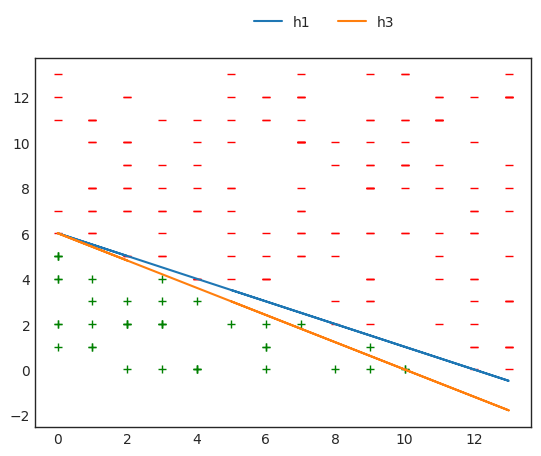

In [12]:
y_hat = np.array((7.200000000000004-(0.6000000000000005*mat[:,0])-(1.2000000000000017*mat[:,1])))

plt.plot(mat[pos,0], mat[pos,1], 'g+')
plt.plot(mat[neg,0], mat[neg,1], 'r_')
plt.plot(mat[:,0], np.array((-0.5*mat[:,0]+6)), label ='h1')
# plt.plot(mat[:,0], np.array((-0.2*mat[:,0]+4)), label ='h2')
plt.plot(mat[:,0], np.array((7.200000000000004-(0.6000000000000005*mat[:,0])-(1.2000000000000017))), label ='h3')
# plt.legend(loc ="lower right")
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
plt.show()




# Logistic Reg

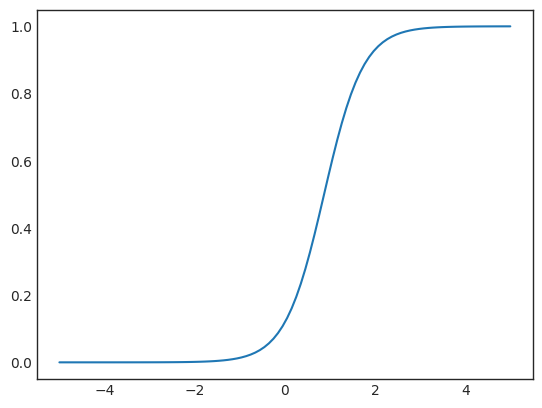

In [13]:
X_val = np.array(np.linspace(-5,5,100))
Y_val = 1/(1+np.exp(-(X_val*2.3 - 2)))
plt.plot(X_val,Y_val)

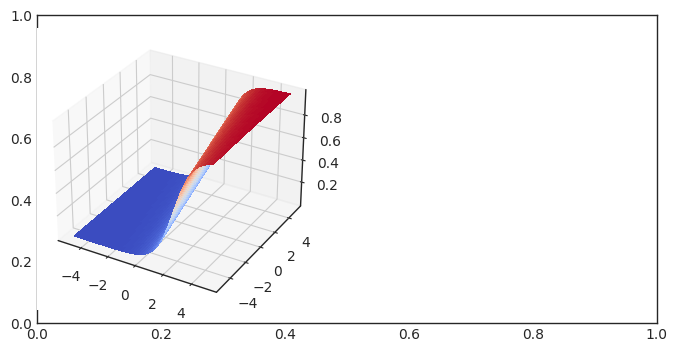

In [14]:
from matplotlib import cm
def z_fun(x_mat):
  x1 = x_mat[0]
  x2 = x_mat[1]
  z = 1/(1+np.exp(-(x1*1.5 + x2 * 0.3 -2)))
  return z


X1_val = np.array(np.linspace(-5,5,100))
X2_val = np.array(np.linspace(-5,5,100))
my_mat = np.hstack((np.ones((100,1)), np.hstack(((np.asmatrix(X1_val).T),(np.asmatrix(X2_val).T))))).T
w = np.asmatrix(np.array([-2, 1.5, 0.3]))
y= 1/(1+np.exp(-(w*my_mat)))
# **********************
X1_m, X2_m = np.meshgrid(X1_val, X2_val)
Z = z_fun([X1_m, X2_m])


fig, axs = plt.subplots(figsize = (8, 4))
axs = fig.add_subplot(121, projection='3d')
# *********** 2D
# axs.scatter3D(X1_val,X2_val,np.array(y).flatten(), color = "green")
# ***************3D
axs.plot_surface(X1_m,X2_m,Z,cmap=cm.coolwarm, linewidth=0, antialiased=False)


# Mix_class Problem

In [15]:
path = '/content/drive/MyDrive/Colab Notebooks/npyfolder/mat_mix_class.npy'
# np.save(path,mat_skeleton)
mat_skeleton = np.load(path)

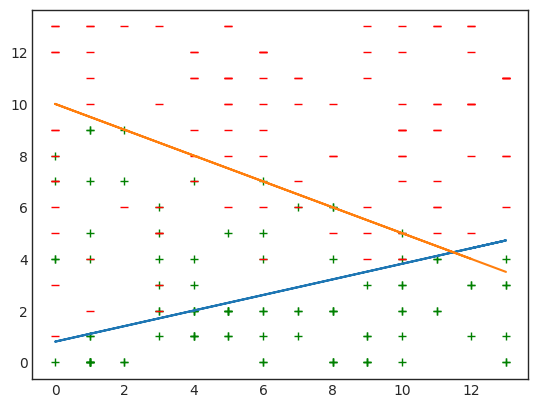

In [16]:
pos = np.where(mat_skeleton[:,2]==1)[0]
neg = np.where(mat_skeleton[:,2]==-1)[0]
x_lin = np.linspace(0,12,50)
y_lin_sqre = np.array((np.square(mat_skeleton[:,0] *0.01 )) +(mat_skeleton[:,0]*0.3)+0.8) # Line one quadratic
y_lin_linear = np.array((-0.5*mat_skeleton[:,0]+10))  # line two linear

plt.plot(mat_skeleton[pos,0], mat_skeleton[pos,1], 'g+')
plt.plot(mat_skeleton[neg,0], mat_skeleton[neg,1], 'r_')
plt.plot(mat_skeleton[:,0], y_lin_sqre )
plt.plot(mat_skeleton[:,0], y_lin_linear, label ='h2')


The min err term is [0.45419032], and that correspond to alph vector of [0.3, array([[0.16551724]]), array([[-0.35862069]])]


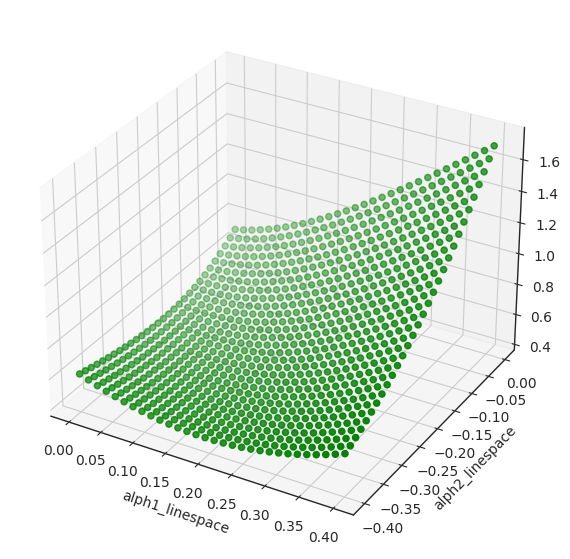

In [17]:
# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# This block illustrate the actual framework of logistic regression and the use of MaxLikehood log as lose func
# *********************************************
# ****** simply return the sig of our prediction as the prob val
def sig_fun(y):
  y_list = []
  for i in y:
    item = i.item(0)
    prob = 1/(1+(np.exp(-(item))))
    y_list.append(prob)
  y = np.array(y_list)
  return y
# ******************************

# ********* function to generate load of alph vectors
def alph_fun(v0, v1, v2):
  list_val = []
  for i in range(len(v1)):
    val1 = v1[i]
    for j in v2:
      val_arr = [v0, val1, j]
      list_val.append(val_arr)

  return (np.asmatrix(np.array(list_val)))

a0 = 0.3
a1 = np.linspace(0,0.4, 30)
a2 = np.linspace(-0.4,0, 30)
alph_vec_fun = alph_fun(a0,a1, a2)

# ******** decide the alpha vector and prepare the data matrix
# alphs_vec = np.asmatrix(np.array([0.3,0.2,-0.3])).T
mat_skeleton_ds = np.asmatrix(mat_skeleton[:,1]).T
mat_skeleton_ds = np.hstack((np.asmatrix(mat_skeleton[:,0]).T, mat_skeleton_ds))
# ***********
mat_sk_training_set = mat_skeleton_ds # will be used later in the training of alg
# ***********
mat_skeleton_ds = np.hstack((np.ones((200,1)), mat_skeleton_ds))
# *********************** get the our predicted y val vector
# ************* loop over all possible alphas vec
def predict_fun_alph():
  err_term_list = []
  for i in range(len(alph_vec_fun)):
    alphs_vec = (alph_vec_fun[i]).T
    # print(alphs_vec)
    y_guss = mat_skeleton_ds * alphs_vec
    # ********** sigmouid every y_guss
    y_prob = sig_fun(y_guss)
    # **** make the prediction based on the y_prob val
    y_predict = [1 if k>0.5 else -1 for k in y_prob]
    err_term_l = loose_fun(y_predict, y_prob=y_prob)
    err_term_list.append(err_term_l)
  return np.array(err_term_list)

# Now let's just illustrate our loose fun using the max likehood alg, where l(g,a) a is the acutal
def loose_fun(y_predict, y_prob):
  err_term = 0
  err_term_list = []
  for i in range(len(y_predict)):
    # **take the log of our prob and its complement
    prob_term = np.log(y_prob[i])
    prob_comple = np.log(1 - y_prob[i])
    # **************** prepare the power of the term based on the actual val
    guss_power = 1 if mat_skeleton[:,2][i]==1 else 0
    guss_complem_power = 1 if mat_skeleton[:,2][i]==-1 else 0
    # ********
    # ********** now this illustrate the total err_term based on lterm that represent the likehood alg, of course the negative
    # **********  we can get diff erros depend on the val of the alphas, we want with min err vals, and that can happend if we
    # ********** max the likehood prob
    # lterm = (prob_term ** guss_power) * (prob_comple ** guss_complem_power)
    lterm = -((prob_term * guss_power) + (prob_comple * guss_complem_power))
    err_term = err_term + lterm
    # print(lterm,'closure', y_prob[i], 'predict', y_predict[i], 'actual', mat_skeleton[:,2][i], 'guss_and_actual_pow', guss_power, guss_complem_power , 'prob_compl', (1-y_prob[i]))
  # print('Total Error term with this alph vec', err_term)
  err_term_list.append(err_term/len(y_predict))
  # print(err_term_list)
  return err_term_list

# ************************************************************************
# predict_fun_alph([x1_m, x2_m])

err_term_list = predict_fun_alph()
a1_vals = np.array(alph_vec_fun[:,1])
a2_vals = np.array(alph_vec_fun[:,2])

min_err_val = (min(err_term_list))
index_min_err_val = (np.where(err_term_list == min(err_term_list))[0])

a1_min_err = a1_vals[index_min_err_val]
a2_min_err = a2_vals[index_min_err_val]
print(f'The min err term is {min_err_val}, and that correspond to alph vector of {[a0, a1_min_err, a2_min_err]}')
# ***************** GRAPH
# # Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
plt.xlabel('alph1_linespace')
plt.ylabel('alph2_linespace')
ax.scatter3D(a1_vals, a2_vals, err_term_list, color = "green")



In [23]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings( "ignore" )

# to compare our model's accuracy with sklearn model
from sklearn.linear_model import LogisticRegression
# Logistic Regression
class LogitRegression() :
	def __init__( self, learning_rate, iterations ) :
		self.learning_rate = learning_rate
		self.iterations = iterations

	# Function for model training
	def fit( self, X, Y ) :
		# no_of_training_examples, no_of_features
		self.m, self.n = X.shape
		# weight initialization
		self.W = np.zeros( self.n )
		self.b = 0
		self.X = X
		self.Y = Y

		# gradient descent learning

		for i in range( self.iterations ) :
			self.update_weights()
		return self

	# Helper function to update weights in gradient descent

	def update_weights( self ) :
		A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
    # calculate gradients

		tmp = (A-self.Y.T)

		tmp = np.reshape( tmp, self.m )
		dW = np.dot( self.X.T, tmp ) / self.m
		db = np.sum( tmp ) / self.m

		# update weights
		self.W = self.W - self.learning_rate * dW
		self.b = self.b - self.learning_rate * db

		return self

	# Hypothetical function h( x )

	def predict( self, X ) :
		Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )
		Y = np.where( Z >= 0.5, 1, -1 )
		return Y


# Driver code

def main() :
	y_actual = mat_skeleton[:,2]
	# Importing dataset
	# diabetes.csv
	X = np.array(mat_sk_training_set)
	Y = np.array(y_actual)

	# Splitting dataset into train and test set
	X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, test_size = 1/3, random_state = 0 )

	# Model training
	model = LogitRegression( learning_rate = 0.1, iterations = 1000 )

	model.fit( X_train, Y_train )
	model1 = LogisticRegression()
	model1.fit( X_train, Y_train)

	# Prediction on test set
	Y_pred = model.predict( X_test )
	Y_pred1 = model1.predict( X_test )

	# measure performance
	correctly_classified = 0
	correctly_classified1 = 0

	# counter
	count = 0
	for count in range( np.size( Y_pred ) ) :

		if Y_test[count] == Y_pred[count] :
			correctly_classified = correctly_classified + 1

		if Y_test[count] == Y_pred1[count] :
			correctly_classified1 = correctly_classified1 + 1

		count = count + 1

	print( "Accuracy on test set by our model	 : ", (
	correctly_classified / count ) * 100 )
	print( "Accuracy on test set by sklearn model : ", (
	correctly_classified1 / count ) * 100 )

if __name__ == "__main__" :
	main()

Accuracy on test set by our model	 :  53.73134328358209
Accuracy on test set by sklearn model :  77.61194029850746


In [24]:
# *********** Newton-raphson method for optimization
#  alph_vec = alph + (At B A) * (At * (yhat - y))

mat_skeleton_ds
y_actual = mat_skeleton[:,2]

def newton_opt(max_iter, tol):
  alph_vec = np.asmatrix(np.array([0,0,0])).T.astype('float64')
  for i in range(max_iter):
    y_hat = sig_fun(mat_skeleton_ds * alph_vec)
    # Hessian Mat
    D = np.diag(np.multiply(y_hat,(1-y_hat)).flatten())
    # assembly of the term for new alphas
    if np.linalg.det(D) != 0:
      Minv= np.linalg.inv(np.matmul(np.matmul(mat_skeleton_ds.T,D),mat_skeleton_ds))
      dB = np.matmul(np.matmul(Minv,mat_skeleton_ds.T),np.subtract(y_actual,y_hat)).T
      alph_vec += dB
    # check if we've reached the tolerance
    if tol > np.linalg.norm(dB):
      break
  return [alph_vec, i]

new_alph_fun = newton_opt(max_iter=100, tol=1e-4)
new_alph = new_alph_fun[0]
num_iter = new_alph_fun[1]

y_hat = sig_fun(mat_skeleton_ds * new_alph)
y_predict = np.where( y_hat >= 0.5, 1, -1 )


# counter
count = 0
correctly_classified = 0
for count in range(len(y_predict)):
  if y_predict[count] == y_actual[count] :
    correctly_classified = correctly_classified + 1
  count = count + 1
print( "Accuracy on test set by our model	 : ", (correctly_classified / count ) * 100 )
print("number of iteration is :", num_iter+1)
print("vector of alphas", new_alph)

Accuracy on test set by our model	 :  79.5
number of iteration is : 100
vector of alphas [[21.25928364]
 [-0.33827968]
 [-7.73421466]]


# Multi Class classification

In [25]:
#  classification dataset
from collections import Counter
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# summarize the dataset
# ***********
ds_mul_class = []
for i in range(len(X)):
  row = [X[i][0], X[i][1], y[i]]
  ds_mul_class.append(row)

In [26]:
from sklearn.preprocessing import LabelBinarizer
from collections import Counter
from sklearn.datasets import make_classification
# ds_multi_class = np.array(ds_mul_class)
path = '/content/drive/MyDrive/Colab Notebooks/npyfolder/ds_multi_class.npy'
# np.save(path,ds_mul_class)

In [27]:
ds_mult_class = np.load(path)

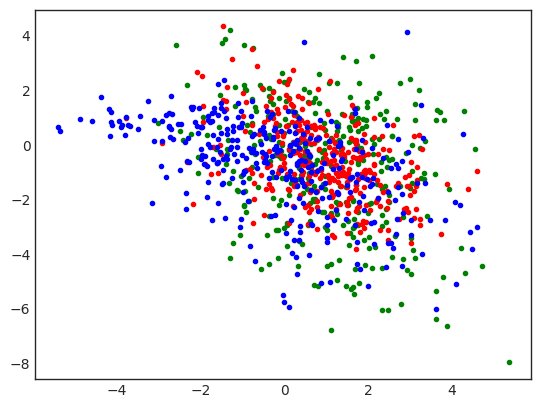

In [28]:
ds_mul_class = np.array(ds_mult_class)
class_0 = np.where(ds_mul_class[:,2]==0)[0]
class_1 = np.where(ds_mul_class[:,2]==1)[0]
class_2 = np.where(ds_mul_class[:,2]==2)[0]
# ********************************************

plt.plot(np.array(ds_mul_class[class_0,0]),np.array(ds_mul_class[class_0,1]),'g.')
plt.plot(np.array(ds_mul_class[class_1,0]),np.array(ds_mul_class[class_1,1]),'r.')
plt.plot(np.array(ds_mul_class[class_2,0]),np.array(ds_mul_class[class_2,1]),'b.')


In [29]:
# Prepare the ds of x and y as data matrix and target vec
x = np.asmatrix(ds_mul_class[:,1]).T
x = np.array(np.hstack((np.asmatrix(ds_mul_class[:,0]).T, x)))
y = np.array(ds_mul_class[:,2].T)
# ******************************
(Counter(y))

Counter({1.0: 334, 0.0: 332, 2.0: 334})

In [30]:
learning_rate = 0.01
n_iter = 1000

In [31]:
# ********* hot code the y label
encoder = LabelBinarizer()
y_oh = encoder.fit_transform(y)


In [32]:
# ************** functions to procced
predict = lambda x, w, b: np.matmul(w,x.T) + b
sigmoid = lambda yhat: 1/(1+np.exp(-yhat))
loss = lambda y, sig: -(y*np.log(sig)+(1-y)*np.log(1-sig)).mean()
dldw = lambda x, y, sig: (np.reshape(sig-y,(x.shape[0],1))*x).mean(axis = 0)
dldb = lambda y, sig: (sig-y).mean(axis = 0)
update = lambda w, grad, lr: w-(grad*lr)

In [33]:
ws,bs = [],[]
# Now let's do for each class its own alphas vec and bias
for c in range(len(Counter(y))):
    b = 0
    w = np.zeros(x.shape[1])
    for i in range(n_iter):
        yhat = predict(x,w,b)
        sig = sigmoid(yhat)
        grad_w = dldw(x,y_oh[:,c],sig)
        grad_b = dldb(y_oh[:,c],sig)
        w = update(w,grad_w,learning_rate)
        b = update(b,grad_b,learning_rate)
    ws.append(w)
    bs.append(b)
ws

[array([0.20212226, 0.03439384]),
 array([0.22900421, 0.1783539 ]),
 array([-0.50769185, -0.16189441])]

In [34]:
# ********* let's do the prediction for each class according to their alphs
sigs = []
for c in range(len(Counter(y))):
    yhat = predict(x,ws[c],bs[c])
    sig = sigmoid(yhat)
    sigs.append(sig)
y_pred = np.argmax(sigs,axis = 0)

In [35]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [36]:
classRep = classification_report(y,y_pred)
print(classRep)

              precision    recall  f1-score   support

         0.0       0.31      0.25      0.28       332
         1.0       0.42      0.41      0.41       334
         2.0       0.52      0.64      0.57       334

    accuracy                           0.43      1000
   macro avg       0.42      0.43      0.42      1000
weighted avg       0.42      0.43      0.42      1000



In [37]:
lg_mod = LogisticRegression()
lg_mod.fit(x,y)
y_pred = lg_mod.predict(x)
classRep = classification_report(y,y_pred)
print(classRep)

              precision    recall  f1-score   support

         0.0       0.32      0.25      0.28       332
         1.0       0.42      0.43      0.43       334
         2.0       0.52      0.62      0.56       334

    accuracy                           0.43      1000
   macro avg       0.42      0.43      0.42      1000
weighted avg       0.42      0.43      0.42      1000



# Naive Bayes Alg

In [38]:
# ************** Let's us try the Naive Bayes Alg
ds_mult_class

array([[ 1.89149379, -0.39847585,  1.        ],
       [ 1.86913773, -0.56336215,  0.        ],
       [ 1.95259701, -2.83144572,  1.        ],
       ...,
       [ 1.98033054,  1.37228804,  0.        ],
       [-1.54305631, -0.27530218,  2.        ],
       [ 1.17970389, -3.3812155 ,  1.        ]])

<Figure size 90x63 with 0 Axes>

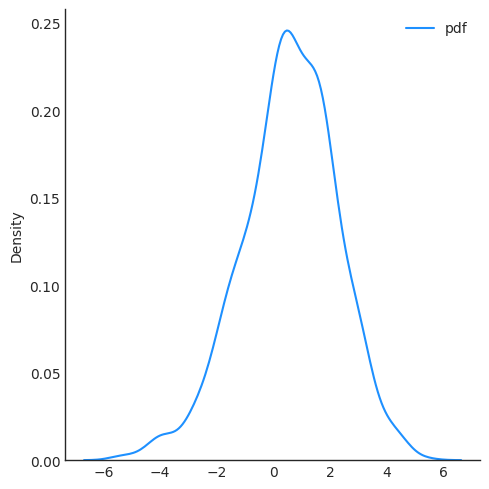

<Figure size 90x63 with 0 Axes>

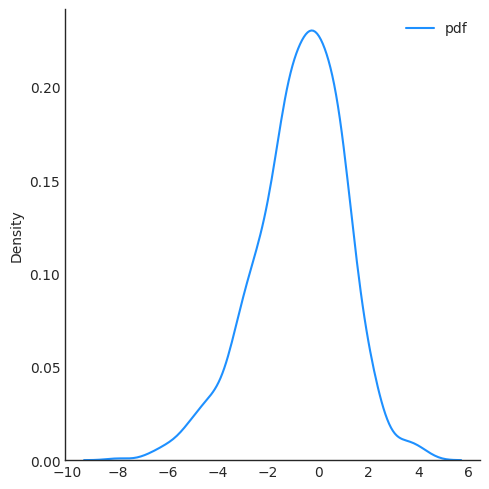

In [39]:
# View of the dist of the ds vars
x1 = np.array(ds_mult_class[:,0])
x2 = np.array(ds_mult_class[:,1])
X_plt = [x1, x2]
# Plot
for item in X_plt:
  plt.figure(figsize=(3,2.1), dpi= 30)
  sns.displot(item, color="dodgerblue", label="pdf",kind="kde")
  plt.legend();

In [40]:
# let's work on this sub for train and test
ds_train = ds_mult_class[:900,:]
ds_test = ds_mult_class[900:,:]

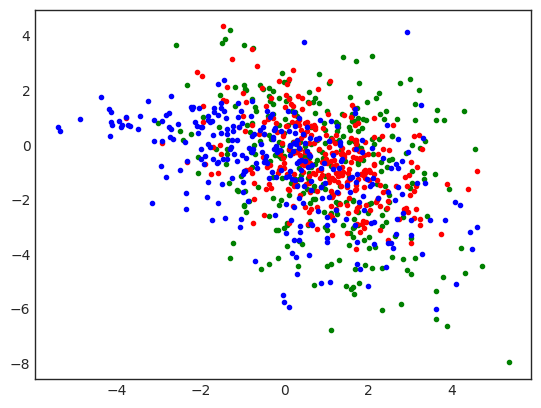

In [41]:
class_0 = np.where(ds_train[:,2]==0)[0]
class_1 = np.where(ds_train[:,2]==1)[0]
class_2 = np.where(ds_train[:,2]==2)[0]
# ********************************************

plt.plot(np.array(ds_train[class_0,0]),np.array(ds_train[class_0,1]),'g.')
plt.plot(np.array(ds_train[class_1,0]),np.array(ds_train[class_1,1]),'r.')
plt.plot(np.array(ds_train[class_2,0]),np.array(ds_train[class_2,1]),'b.')

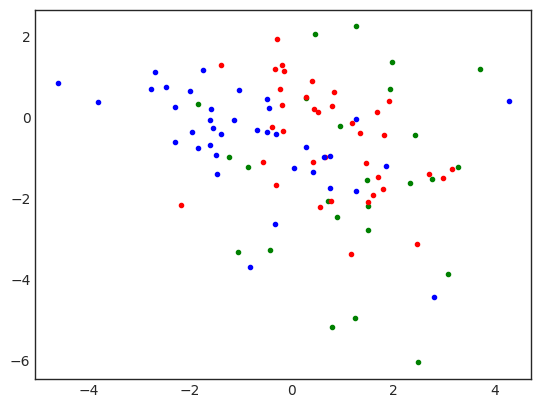

In [42]:
class_0 = np.where(ds_test[:,2]==0)[0]
class_1 = np.where(ds_test[:,2]==1)[0]
class_2 = np.where(ds_test[:,2]==2)[0]
# ********************************************

plt.plot(np.array(ds_test[class_0,0]),np.array(ds_test[class_0,1]),'g.')
plt.plot(np.array(ds_test[class_1,0]),np.array(ds_test[class_1,1]),'r.')
plt.plot(np.array(ds_test[class_2,0]),np.array(ds_test[class_2,1]),'b.')

In [43]:
ds_train
ds_test
# **********************
# * cpature the prob of each class
class_list = []
for item in Counter(ds_train[:,2]).items():
  class_nam = item[0]
  class_num = item[1]
  val = [class_nam, class_num/len(ds_train)]
  class_list.append(val)
# **********
class_list[0][1]

lbl_prob = [
    class_list[1][1],
    class_list[0][1],
    class_list[2][1]
]
class_list

[[1.0, 0.33], [0.0, 0.3411111111111111], [2.0, 0.3288888888888889]]

In [44]:

lbl_prob

# ************ let's construct the model
class_0 = np.where(ds_train[:,2]==0)[0]
class_1 = np.where(ds_train[:,2]==1)[0]
class_2 = np.where(ds_train[:,2]==2)[0]
# *********************
#  dig fun
def dig_fun(arr_list):
  arr_dig = np.diag(arr_list.flatten())
  return arr_dig

# ****************
# class 0
c0_x1_mean = np.array(ds_train[class_0,0]).mean()
c0_x2_mean = np.array(ds_train[class_0,1]).mean()

c0_x1_var = np.array(ds_train[class_0,0]).var()
c0_x2_var = np.array(ds_train[class_0,1]).var()


c0_mean_vec = np.array([c0_x1_mean, c0_x2_mean])
c0_sig_mat = dig_fun(np.array([c0_x1_var, c0_x2_var]))
c0_sig_mat_inv = np.linalg.inv(c0_sig_mat)
c0_sig_mat_det = np.linalg.det(c0_sig_mat)


# class 1
c1_x1_mean = np.array(ds_train[class_1,0]).mean()
c1_x2_mean = np.array(ds_train[class_1,1]).mean()

c1_x1_var = np.array(ds_train[class_1,0]).var()
c1_x2_var = np.array(ds_train[class_1,1]).var()

c1_mean_vec = np.array([c1_x1_mean, c1_x2_mean])
c1_sig_mat = dig_fun(np.array([c1_x1_var, c1_x2_var]))
c1_sig_mat_inv = np.linalg.inv(c1_sig_mat)
c1_sig_mat_det = np.linalg.det(c1_sig_mat)

# class 2
c2_x1_mean = np.array(ds_train[class_2,0]).mean()
c2_x2_mean = np.array(ds_train[class_2,1]).mean()

c2_x1_var = np.array(ds_train[class_2,0]).var()
c2_x2_var = np.array(ds_train[class_2,1]).var()

c2_mean_vec = np.array([c2_x1_mean, c2_x2_mean])
c2_sig_mat = dig_fun(np.array([c2_x1_var, c2_x2_var]))
c2_sig_mat_inv = np.linalg.inv(c2_sig_mat)
c2_sig_mat_det = np.linalg.det(c2_sig_mat)
# *****************************
# *****************************
# *** prepare the fit array that contains the det, mean_vec and the inv mat
fit_arr = [
    [c0_sig_mat_det, c0_mean_vec, c0_sig_mat_inv],
    [c1_sig_mat_det, c1_mean_vec, c1_sig_mat_inv],
    [c2_sig_mat_det, c2_mean_vec, c2_sig_mat_inv]
]

# predict fun
def pred_fun(arr_list):
  dim = len(c1_mean_vec)
  instance_val_list = []
  for i in arr_list:
    i_pred_list = []
    prob_list = []
    count_in = 0
    for j in fit_arr:
      term2 = np.exp(-0.5 * (np.matmul(np.matmul((i - j[1]).T, j[2]), (i-j[1]))))
      term1 = 1/np.sqrt((((np.pi * 2)**dim) * j[0]))
      pred_val = (term1*term2) * lbl_prob[count_in]
      class_name = fit_arr.index(j)
      val = [class_name, 'prob_val', pred_val]
      i_pred_list.append(val)
      prob_list.append(pred_val)
      count_in += 1
    max_prob_val = max(prob_list)
    # class_pred = prob_list.index(max_prob_val)
    class_pred = None
    for indx in range(len(i_pred_list)):
      if max_prob_val == i_pred_list[indx][2]:
        class_pred = indx
    final_val = [i_pred_list, 'Max_ prob is: ', max_prob_val, 'Predicted class is: ', class_pred]
    instance_val_list.append(final_val)
  return instance_val_list


# ************* let's pass the ds_test to make prediction
final_pred_arr = pred_fun(ds_test[:,:2])
actual_lbl = np.array(ds_test[:,2])

fnl_pred_list = []
for itm in range(len(final_pred_arr)):
  fnl_pred_list.append(final_pred_arr[itm][4])

fnl_pred_list = np.array(fnl_pred_list)

# accuracy test

# counter
count = 0
correctly_classified = 0
for count in range(len(actual_lbl)):
  if actual_lbl[count] == fnl_pred_list[count] :
    correctly_classified = correctly_classified + 1
  count = count + 1
print( "Accuracy on test set by our model	 : ", (correctly_classified / count ) * 100 )



Accuracy on test set by our model	 :  64.0


# Deep Learning

In [46]:
from sklearn.preprocessing import LabelBinarizer
from collections import Counter
from sklearn.datasets import make_classification
# ds_multi_class = np.array(ds_mul_class)
path = '/content/drive/MyDrive/Colab Notebooks/npyfolder/mat_mix_class.npy'

13 11 [-1.]
10 13 [1.]
13 11 [-1.]
10 13 [-1.]


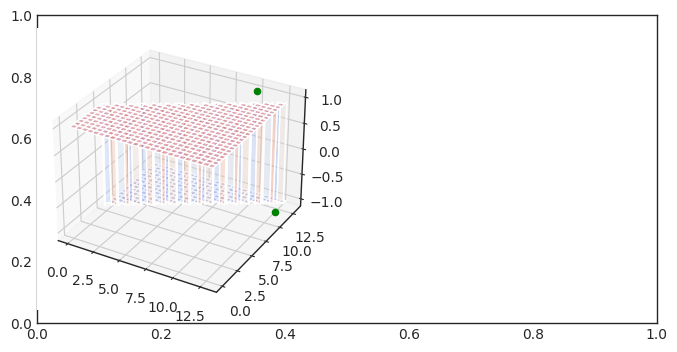

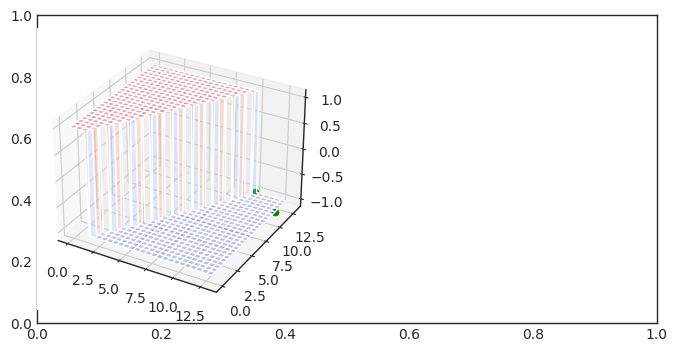

In [47]:

ds = np.load(path)
x1_feature = np.array(ds[:200,0])
x2_feature = np.array(ds[:200,1])
y_feature = np.array(ds[:200,2])


x1_lin = np.linspace(x1_feature.min(), x1_feature.max(), 200)
x2_lin = np.linspace(x2_feature.min(), x2_feature.max(), 200)

# ******************************************
def z_fun(x,y,w,b,ves=False):
  X_feature = np.array([x,y]).T
  val = np.matmul(X_feature, w) + b
  if ves == False:
    val[(val >= 0)] = 1
    val[(val < 0)] = -1
    return val
  else:
    return val

def k_fun(x,y,w,b, ves=False):
  X_feature = np.array([x,y]).T
  val = np.matmul(X_feature, w) + b
  if ves == False:
    val[(val >= 0)] = 1
    val[(val < 0)] = -1
    return val
  else:
    return val
# **************************************************

w_z = np.array([-0.2, 0.12])
b_z = 0.93

w_k = np.array([0.40, -0.60])
b_k = 0.90

x,y = np.meshgrid(x1_lin, x2_lin)
Z = z_fun(x,y,w_z,b_z)
K = k_fun(x,y,w_k,b_k)

# **********************
fig, axs = plt.subplots(figsize = (8, 4))
axs1 = fig.add_subplot(121, projection='3d')
axs1.plot_surface(x,y,Z,cmap='coolwarm', rstride=8, cstride=8, alpha=0.3)

# ******** invastigate first observation in our ds e.g. data point 1
dp1 = z_fun(np.array([x1_feature[0]]),np.array([x2_feature[0]]), w_z,b_z)
dp2 = z_fun(np.array([x1_feature[90]]),np.array([x2_feature[90]]), w_z,b_z)

axs1.scatter3D(x1_feature[0], x2_feature[0], dp1, color = "green")
axs1.scatter3D(x1_feature[90], x2_feature[90], dp2, color = "green")

print(x1_feature[0], x2_feature[0], dp1)
print(x1_feature[90], x2_feature[90], dp2)

# # *************************
fig, axs = plt.subplots(figsize = (8, 4))
axs1 = fig.add_subplot(121, projection='3d')
axs1.plot_surface(x,y,K,cmap='coolwarm', rstride=8, cstride=8, alpha=0.3)

dp1 = k_fun(np.array([x1_feature[0]]),np.array([x2_feature[0]]), w_k,b_k)
dp2 = k_fun(np.array([x1_feature[90]]),np.array([x2_feature[90]]), w_k,b_k)

axs1.scatter3D(x1_feature[0], x2_feature[0], dp1, color = "green")
axs1.scatter3D(x1_feature[90], x2_feature[90], dp2, color = "green")

print(x1_feature[0], x2_feature[0], dp1)
print(x1_feature[90], x2_feature[90], dp2)


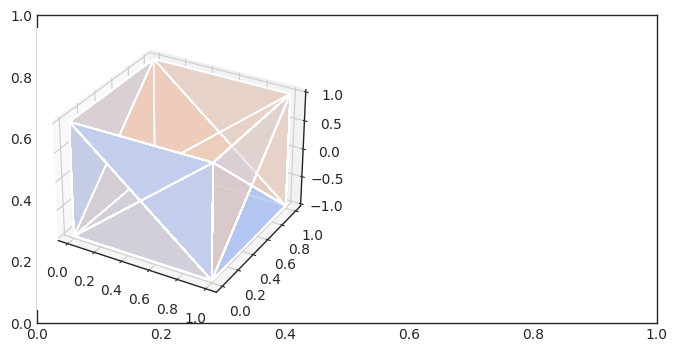

In [48]:
w = np.array([-0.92, -1.19])
b = 0.62

c1 = z_fun(x1_feature, x2_feature, w_z, b_z)
c2 = k_fun(x1_feature, x2_feature, w_k, b_k)

x1_lin_1 = np.random.rand(200)
x2_lin_2 = np.random.rand(200)

x1_lin = np.array([0 if i <=0.6 else 1 for i in x1_lin_1])
# np.random.shuffle(x1_lin)
x2_lin = np.array([0 if i <=0.5 else 1 for i in x2_lin_2])
# np.random.shuffle(x2_lin)

x,y = np.meshgrid(x1_lin, x2_lin)
Z = z_fun(x,y,w,b)
# K = k_fun(x,y,w_k,b_k)

# **********************
fig, axs = plt.subplots(figsize = (8, 4))
axs1 = fig.add_subplot(121, projection='3d')
axs1.plot_surface(x,y,Z,cmap='coolwarm', rstride=8, cstride=8, alpha=0.3)
# *********************************


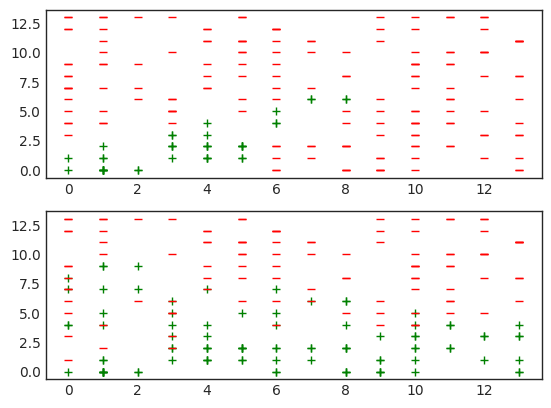

In [49]:
dps = z_fun(np.array([c1]), np.array([c2]), w, b, ves=True)
dps_pred = np.array([-1 if i >= 0 else 1 for i in dps])
# *****************
pos_act = np.where(y_feature[:]==1)[0]
neg_act = np.where(y_feature[:]==-1)[0]
# **************
pos = np.where(dps_pred[:]==1)[0]
neg = np.where(dps_pred[:]==-1)[0]
# ******************************

plt.figure(1)
plt.subplot(211)
plt.plot(x1_feature[pos], x2_feature[pos], 'g+')
plt.plot(x1_feature[neg], x2_feature[neg], 'r_')
plt.subplot(212)
plt.plot(x1_feature[pos_act], x2_feature[pos_act], 'g+')
plt.plot(x1_feature[neg_act], x2_feature[neg_act], 'r_')



# Neural Network

In [50]:
from sklearn.preprocessing import LabelBinarizer
from collections import Counter
from sklearn.datasets import make_classification
# ds_multi_class = np.array(ds_mul_class)
path = '/content/drive/MyDrive/Colab Notebooks/npyfolder/ds_multi_class.npy'

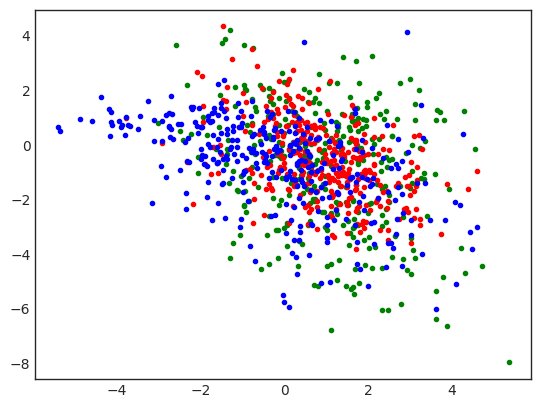

In [51]:
ds_mul_class = np.array(np.load(path))
class_0 = np.where(ds_mul_class[:,2]==0)[0]
class_1 = np.where(ds_mul_class[:,2]==1)[0]
class_2 = np.where(ds_mul_class[:,2]==2)[0]
# ********************************************

plt.plot(np.array(ds_mul_class[class_0,0]),np.array(ds_mul_class[class_0,1]),'g.')
plt.plot(np.array(ds_mul_class[class_1,0]),np.array(ds_mul_class[class_1,1]),'r.')
plt.plot(np.array(ds_mul_class[class_2,0]),np.array(ds_mul_class[class_2,1]),'b.')

In [52]:
ds_train = ds_mul_class[:900,:]
ds_test = ds_mul_class[900:,:]

In [53]:
ds_train

array([[ 1.89149379, -0.39847585,  1.        ],
       [ 1.86913773, -0.56336215,  0.        ],
       [ 1.95259701, -2.83144572,  1.        ],
       ...,
       [ 2.64407133, -2.02578444,  2.        ],
       [ 2.3281975 , -6.07703161,  0.        ],
       [ 2.33811592, -2.97638661,  0.        ]])

In [54]:
'''
  for simplicity we are going to consider only two layers NN
'''
np.random.seed(0)

class NNet:
  def __init__(self, n_node, n_dim, alph_vec=None, bias_vec=None, manu=False):
    if manu == False:
      self.alphs = 0.1 * (np.random.rand(n_dim, n_node))   # (np.random.rand(n_node, n_dim)) insted of T everytime, just shift now the two vals
      self.bias = np.zeros((1,n_node))
    else:
      self.alphs = alph_vec
      self.bias = bias_vec

  def forward(self, x_input):
    self.output = np.matmul(x_input, self.alphs) + self.bias


class ActFun:
  def forward(self, x_input):
    # it's a RelU activation either 0 or the output as it's larger than 0
    self.output = np.maximum(0, x_input)

class SoftMaxAct:
  def forward(self, x_input):
    exp_vals = np.exp(x_input - np.max(x_input, axis=1, keepdims=True))
    sum_vals_case = np.sum(exp_vals, axis=1, keepdims=True)
    prob_vals = exp_vals / sum_vals_case
    self.output = prob_vals

class LossCls:
  def calcerr(self, output_val, y_val):
    output_val = np.clip(output_val, 1e-7, 1-1e-7)
    loss_neg_log = -np.log(output_val[range(len(output_val)), np.argmax(y_val, axis=1)])
    self.output = np.mean(loss_neg_log)
  def accura(self, output_val, y_val):
    y_act = np.argmax(y_val, axis=1)
    y_pred = np.argmax(output_val, axis=1)
    self.output_acc = (np.mean(y_act == y_pred))

class PropgationCls:
  def propforward(self, main_input ,activ_l1output, softoutput_vec, actual_vec, lr,
                  l1bias_vec, l1alph_vec, l2bias_vec, l2alph_vec):
    y_haty = softoutput_vec - actual_vec
    self.bias2_update = l2bias_vec - (y_haty * lr)

    dz = np.matmul(activ_l1output.T, y_haty) * lr
    self.alph2_update = l2alph_vec - dz
    # *****************************************

    errvecdz = np.matmul(l2alph_vec, y_haty.T)
    self.bias1_update = l1bias_vec - (errvecdz.T * lr)

    self.alph1_update = l1alph_vec - (np.matmul(main_input.T,errvecdz.T)* lr)
    # ********************

encoder = LabelBinarizer()
y_oh = encoder.fit_transform(ds_train[:900,2])

num_batch = 1

# ********* main input data
X = ds_train[:num_batch,:2]
print('INPUT', X)

l1 = NNet(n_dim=X.shape[1], n_node=4)
activ_l1 = ActFun()

l1.forward(X)
# print(l1.output)
activ_l1.forward(l1.output)
print('L1 alph+b',l1.alphs, l1.bias, l1.alphs.shape)
print('Output, and INPUT for next')
print(activ_l1.output)

print('******************************************')
l2 = NNet(n_dim=(l1.output).shape[1], n_node=3)
softmax_act_l2 = SoftMaxAct()

l2.forward(activ_l1.output)
# print(l2.output)
# print('L2 alph+b',l2.alphs, l2.bias, l2.alphs.shape)

softmax_act_l2.forward(x_input=l2.output)
print('L2 alph+b',l2.alphs, l2.bias, l2.alphs.shape)
print('Output, and Prediction for comparasion')
print('we call it the y hat')
print(softmax_act_l2.output)

print('******************************************')

# ***************************************************************
print('this the actual lable')
print(y_oh[:num_batch])

# ************
print('**************************************')
y_haty= softmax_act_l2.output - y_oh[:num_batch]
print('yhat - y', y_haty)
print('**************************')
print('to update the bias, take every err * lr then subtract that from the old bias')
bias2_update = l2.bias - (y_haty * 0.01)
print(bias2_update)
print('************************')
print('to update the Alph2 mat')
dz = np.matmul(activ_l1.output.T, y_haty) * 0.01
print('each err multiplied by the vector output from L1 and some lr = 0.01, that get you nxn mat')
print(dz)
print('********************************')
print('to update Alph2 mat, we subtract old from the new, that is old alph2 - new alph2*lr')
print('this is my new alph2')
update_alph2 = l2.alphs - dz
print(update_alph2)
print('*******************************************')
print('Now we shall get back and update the Alph1 and bias one ')
print('***************************************')
print('first lets take the err and multiply that by the alph2 old, that is 4x3. 3x1, result in vector that will be used for new bias and alphs')
errvecdz = np.matmul(l2.alphs, y_haty.T)
print(errvecdz)
print('from previous vec lets first get the new bias one, by multiply the pre vec by lr and subtract from old bias')
bias1_update = l1.bias - (errvecdz.T * 0.01)
print('the new bias1 vector is')
print(bias1_update)
print('previous output multiply by the original input, and then multiply by lr 0.01 then subtract from the old alph1')
update_alph1 = l1.alphs - (np.matmul(X.T,errvecdz.T)* 0.01)
print('this is the new alph1')
print(update_alph1)
print('******************************************')
print('Now we have the new alph1, alph2 for each layer and their biases/ let do a new round and see')
print('**********************************************************')

l1_update = NNet(n_dim=X.shape[1], n_node=4, alph_vec=update_alph1, bias_vec=bias1_update, manu=True)
activ_l1_update = ActFun()
l1_update.forward(X)
activ_l1_update.forward(l1_update.output)
print('L1 update alph+b',l1_update.alphs, l1_update.bias, l1_update.alphs.shape)
print('Output, and INPUT for next')
print(activ_l1_update.output)
print('**********************************************************')
print('lets now look and the second layer output')
print('******************************')

l2_update = NNet(n_dim=(l1.output).shape[1], n_node=3, alph_vec=update_alph2, bias_vec=bias2_update, manu=True)
softmax_act_l2_update = SoftMaxAct()

l2_update.forward(activ_l1_update.output)

softmax_act_l2_update.forward(x_input=l2_update.output)
print('l2_update alph+b',l2_update.alphs, l2_update.bias, l2_update.alphs.shape)
print('Output, and Prediction for comparasion')
print('we call it the NEW NEW y hat')
print(softmax_act_l2_update.output)

print('the previous round y hat OLD OLD is, we hope that what we want increase and other descrese')
print(softmax_act_l2.output)

print('this the actual lable')
print(y_oh[:num_batch])


INPUT [[ 1.89149379 -0.39847585]]
L1 alph+b [[0.05488135 0.07151894 0.06027634 0.05448832]
 [0.04236548 0.06458941 0.04375872 0.0891773 ]] [[0. 0. 0. 0.]] (2, 4)
Output, and INPUT for next
[[0.08692611 0.1095403  0.09657553 0.06752932]]
******************************************
L2 alph+b [[0.09636628 0.03834415 0.0791725 ]
 [0.05288949 0.05680446 0.09255966]
 [0.00710361 0.00871293 0.00202184]
 [0.08326198 0.07781568 0.08700121]] [[0. 0. 0.]] (4, 3)
Output, and Prediction for comparasion
we call it the y hat
[[0.3335779  0.33197155 0.33445055]]
******************************************
this the actual lable
[[0 1 0]]
**************************************
yhat - y [[ 0.3335779  -0.66802845  0.33445055]]
**************************
to update the bias, take every err * lr then subtract that from the old bias
[[-0.00333578  0.00668028 -0.00334451]]
************************
to update the Alph2 mat
each err multiplied by the vector output from L1 and some lr = 0.01, that get you nxn mat
[[

In [55]:
propagobj = PropgationCls()

num_batch = 100 #len(ds_train)
lr = 0.01
X = ds_train[:num_batch,:2]
y_oh[:num_batch]

# *************************************

main_input = X
activ_l1output = None
softoutput_vec = None
actual_vec = y_oh[:num_batch]
lr = lr
l1bias_vec = None
l1alph_vec = None
l2bias_vec = None
l2alph_vec = None


for round in range(2):
  if round == 0:
    l1 = NNet(n_dim=X.shape[1], n_node=4)
    activ_l1 = ActFun()

    l1.forward(X)
    activ_l1.forward(l1.output)

    l2 = NNet(n_dim=(l1.output).shape[1], n_node=3)
    softmax_act_l2 = SoftMaxAct()

    l2.forward(activ_l1.output)
    softmax_act_l2.forward(x_input=l2.output)

    # assign all vars
    activ_l1output = activ_l1.output
    softoutput_vec = softmax_act_l2.output
    l1bias_vec = l1.bias
    l1alph_vec = l1.alphs
    l2bias_vec = l2.bias
    l2alph_vec = l2.alphs

  else:
    for iter in range(150):
      propagobj.propforward(main_input=main_input, activ_l1output=activ_l1output, softoutput_vec= softoutput_vec,
                            actual_vec=actual_vec, lr=lr, l1bias_vec=l1bias_vec, l1alph_vec=l1alph_vec,
                            l2bias_vec=l2bias_vec, l2alph_vec=l2alph_vec)
      # print(propagobj.bias1_update, 'bias1')
      # print(propagobj.alph1_update, 'alph1')
      # print(propagobj.bias2_update, 'bias')
      # print(propagobj.alph2_update, 'alph2')

      l1_update = NNet(n_dim=X.shape[1], n_node=4, alph_vec=propagobj.alph1_update, bias_vec=propagobj.bias1_update, manu=True)
      activ_l1_update = ActFun()
      l1_update.forward(X)
      activ_l1_update.forward(l1_update.output)

      l2_update = NNet(n_dim=(l1.output).shape[1], n_node=3, alph_vec=propagobj.alph2_update, bias_vec=propagobj.bias2_update, manu=True)
      softmax_act_l2_update = SoftMaxAct()

      l2_update.forward(activ_l1_update.output)
      softmax_act_l2_update.forward(x_input=l2_update.output)
      # **************** assign vars
      activ_l1output = activ_l1_update.output
      softoutput_vec = softmax_act_l2_update.output
      l1bias_vec = l1_update.bias
      # l1bias_vec = l1bias_vec[-1]
      l1alph_vec = l1_update.alphs

      l2bias_vec = l2_update.bias
      # l2bias_vec = l2bias_vec[-1]
      l2alph_vec = l2_update.alphs


In [ ]:
# predict on data model didn't see before

num_batch = 100

y_oh = encoder.fit_transform(ds_test[:,2])
X = ds_test[:num_batch,:2]

# ****************************************
l1_update = NNet(n_dim=X.shape[1], n_node=4, alph_vec=l1alph_vec, bias_vec=l1bias_vec[:num_batch,:], manu=True)
activ_l1_update = ActFun()
l1_update.forward(X)
activ_l1_update.forward(l1_update.output)

l2_update = NNet(n_dim=(l1.output).shape[1], n_node=3, alph_vec=l2alph_vec, bias_vec=l2bias_vec[:num_batch,:], manu=True)
softmax_act_l2_update = SoftMaxAct()

l2_update.forward(activ_l1_update.output)

softmax_act_l2_update.forward(x_input=l2_update.output)
# print(softmax_act_l2_update.output)

modelPerf = LossCls()
modelPerf.calcerr(output_val=softmax_act_l2_update.output, y_val=y_oh[:num_batch])
modelPerf.accura(output_val=softmax_act_l2_update.output, y_val=y_oh[:num_batch])

print('amount of err had accured',modelPerf.output)
print('accuracy of guess',modelPerf.output_acc * 100, '%')


# Image Problem

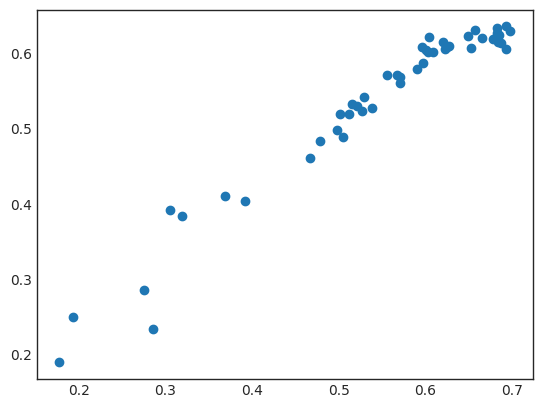

In [58]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
faces.images.shape

plt.scatter(faces.images[2][0], faces.images[2][1])


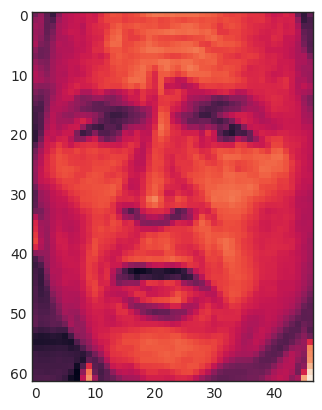

In [ ]:
plt.imshow(faces.images[2])

In [ ]:
faces.images[0].shape

(62, 47)

In [ ]:
print('before padd img size',faces.images[0].shape)

# create padding fun that is sutiable for 4x4 filter
def padd_fun(input_var):
  # create horizontal vector of zeros for top and bottom
  padd_horiz = np.zeros((1, input_var.shape[1]), dtype="float32")

  tra1 = np.vstack([input_var, padd_horiz])
  tra2 = np.vstack([padd_horiz, tra1])

  # create verticall of zeros for right and left, and adjust the shape to fit the filter
  padd_ver = np.zeros((tra2.shape[0],1), dtype="float32")
  # add to the right
  tra3 = np.hstack((tra2, padd_ver))
  tra4 = np.hstack((tra3, padd_ver))
  # add to the left
  tra5 = np.hstack((padd_ver, tra4))
  tra6 = np.hstack((padd_ver, tra5))
  tra7 = np.hstack((padd_ver, tra6))

  return tra7


img_padd = padd_fun(faces.images[0])
print('after padd size', img_padd.shape)


before padd img size (62, 47)
after padd size (64, 52)


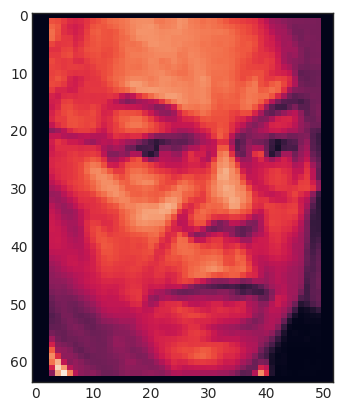

In [ ]:
plt.imshow(faces.images[0])
plt.imshow(img_padd)

In [ ]:
# create the filter
from numpy import random
filt1 = random.rand(4, 4)
filt2 = np.array([[1, 0, -1, 1],
    [2, 0, -2, 2],
    [-1, 0, 1, -1],
    [-2, 0, 2, -2]])

filt2

array([[ 1,  0, -1,  1],
       [ 2,  0, -2,  2],
       [-1,  0,  1, -1],
       [-2,  0,  2, -2]])

(64, 52)
[[0.49150327 0.5071896  0.5267974  0.5437909 ]
 [0.4862745  0.49150327 0.52287585 0.5542484 ]
 [0.4901961  0.4888889  0.5071896  0.5372549 ]
 [0.4928105  0.49150327 0.49411765 0.50849676]] (4, 4) (4, 4)
0.009150177240371704
(61, 49)


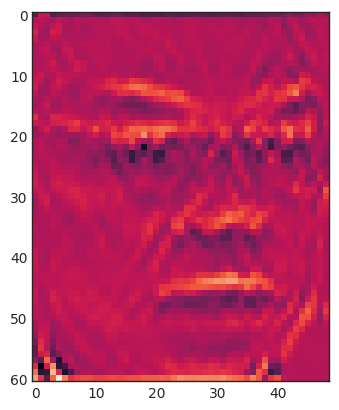

In [ ]:
print(img_padd.shape)

row_indx = img_padd.shape[0]
col_indx = img_padd.shape[1]
filt_len_outter = len(filt2)
filt_len_inner = len(filt2)
outter_stop = row_indx
inner_stop = col_indx

row_shape = row_indx - (filt_len_inner-1)
col_shape = col_indx - (filt_len_inner-1)


operation_list = []
for i in range(row_indx):
  if filt_len_outter <= outter_stop:
    filt_len_inner = len(filt2)
    for j in range(col_indx):
      if filt_len_inner <= inner_stop:
        # print('(',i,":",filt_len_outter, ",", j, ":", filt_len_inner, ")")
        mat = img_padd[i:filt_len_outter, j:filt_len_inner]
        #  illustrate single pic 4x4 from the mat and its operation on the filter
        # **************************
        if i == 10 and j == 10:
          print(mat, mat.shape, filt2.shape)
          print(np.sum(mat * filt2))
          plt.imshow(mat)
        # ************************************
        operation_val = np.sum(mat * filt2)
        operation_list.append(operation_val)
        filt_len_inner += 1
    filt_len_outter += 1

conve_l = np.reshape(np.array(operation_list), (row_shape, col_shape))
print(conve_l.shape)
plt.imshow(conve_l)

# Reinforcement Concept

In [59]:
import gc
import random
gc.collect()

class RenforcCls:
  def __init__(self, arrlist):
    self._num_epo = arrlist['num_epo']
    self._max_step = arrlist['max_step']
    self._lr = arrlist['lr']
    self._lamda = arrlist['lamda']
    self._explor_rate = arrlist['explor_rate']
    self._max_er = arrlist['max_er']
    self._min_er = arrlist['min_er']
    self._decy_er = arrlist['decy_er']
    self._exit_cond = arrlist['exit_cond']

    self.awardlist = []

  def _qtabel(self, num_state, num_action):
    Qtabel = np.zeros((num_state, num_action))
    return Qtabel

  def _reward(self, tub_as):
    val = None
    if tub_as == (1,0):
      val = -1
    elif tub_as == (1,1):
      val = 1
    elif tub_as == (1,2):
      val = 1
    elif tub_as == (2,0):
      val = 1
    elif tub_as == (2,1):
      val = -1
    elif tub_as == (2,2):
      val = -1
    return val

  def _updateq(self, old_val, reward, max_val):
    new_val = ((1-self._lr) * old_val) + (self._lr * (reward + (self._lamda * max_val)))
    return new_val

  def _decayval(self,episode):
    # slow decay
    val = (self._max_er - self._min_er) * np.exp(-self._decy_er*episode)
    explor_rate = self._min_er + val

    # fast decay
    # explor_rate = exploration_rate * ((1-exploration_decay_rate)**i)

    return explor_rate

  def _explore(self, Qtabel, state_start):
    # print('IAM IN EXPLORE INNER FUN')
    # chose random action from the three are available
    action = random.choice([0,1,2])
    # chose random next random state, nature course of actions
    next_state = random.choice([1,2])
    # define the nexstate and action tuble
    s = (next_state, action)
    # let's see the reward from the action and the next state
    reward = self._reward(tub_as=s)

    # update the Qtabel
    # first the arg max val
    indx_max = np.argmax(Qtabel[next_state])
    val_max = Qtabel[next_state][indx_max]
    # the old val of the q tabel
    rowindx, colindx = state_start, action
    old_q_val = Qtabel[rowindx][colindx]
    # send info to updateq fun
    new_val = self._updateq(old_val=old_q_val, max_val=val_max, reward=reward)

    Qtabel[rowindx][colindx] = new_val

    # TEMP
    bo = [action, next_state, reward, val_max, old_q_val ,new_val]
    # print("----------------------------")
    # print(bo, 'state start', state_start)
    # print("----------------------------")

    return [Qtabel, next_state,s, reward, bo]

  def _exploit(self, Qtabel, state_start):
    # choose the arg max of action in the current state
    action = np.argmax(Qtabel[state_start])
    # chose the next state
    next_state = random.choice([1,2])
    # define the nexstate and action tuble
    s = (next_state, action)
    # see the reward of that
    reward = self._reward(tub_as=s)

    # update the Qtabel
    # first the arg max val
    indx_max = np.argmax(Qtabel[next_state])
    val_max = Qtabel[next_state][indx_max]
    # the old val of the q tabel
    rowindx, colindx = state_start, action
    old_q_val = Qtabel[rowindx][colindx]
    # send info to updateq fun
    new_val = self._updateq(old_val=old_q_val, max_val=val_max, reward=reward)

    # *** TEMP
    bo = [action, next_state, reward, val_max, old_q_val ,new_val]
    # print("----------------------------")
    # print(bo, 'state start', state_start)
    # print("----------------------------")

    Qtabel[rowindx][colindx] = new_val
    return [Qtabel, next_state,s, reward, bo]

  def train(self, num_stat, num_action):
    Qtabel = self._qtabel(num_state= num_stat, num_action=num_action)
    exit_cond = (1,1)

    print(Qtabel)

    for epo in range(self._num_epo):
      state_start = 0
      reward_current_epo = 0

      for steps in range(self._max_step):
        # to explore or exploite
        num = random.random()
        print(num, self._explor_rate)

        if self._explor_rate > num:
          print('Exploration steps: ', steps)
          # send to exploration fun
          Qtabel = self._explore(Qtabel=Qtabel, state_start=state_start)[0]

          # fix the state_start to the next_state val
          next_state = self._explore(Qtabel=Qtabel, state_start=state_start)[1]
          state_start = next_state

          s = self._explore(Qtabel=Qtabel, state_start=state_start)[2]

          reward_current_epo += self._explore(Qtabel=Qtabel, state_start=state_start)[3]

          # *******TEMP
          action = self._explore(Qtabel=Qtabel, state_start=state_start)[4][0]
          next_state = self._explore(Qtabel=Qtabel, state_start=state_start)[4][1]
          reward = self._explore(Qtabel=Qtabel, state_start=state_start)[4][2]
          val_max = self._explore(Qtabel=Qtabel, state_start=state_start)[4][3]
          old_q_val = self._explore(Qtabel=Qtabel, state_start=state_start)[4][4]
          new_val = self._explore(Qtabel=Qtabel, state_start=state_start)[4][5]


          print('*********************')
          print('the action is: ', action, 'the next RANDOM stage is: ', next_state, 'the rward of action: ', reward )
          print('to update qval, the val max in next stage  ', next_state, 'is  ', val_max, ' the old val in the start state  ', old_q_val)
          print('the new update val ', new_val)
          print('*********************')

          print('the start state now is: ', state_start)
          print('the Qval tabel is ')
          print(Qtabel)
          print('*********************************')

          if s == exit_cond:
            # print('i exit this round at: ', steps, 'reward is: ', reward)
            break
        else:
          print('exploitation*************** steps: ', steps)
          # send to exploitation fun
          Qtabel = self._exploit(Qtabel=Qtabel, state_start=state_start)[0]

          # fix the state_start to the next_state val
          next_state = self._exploit(Qtabel=Qtabel, state_start=state_start)[1]
          state_start = next_state

          s = self._exploit(Qtabel=Qtabel, state_start=state_start)[2]

          reward_current_epo += self._exploit(Qtabel=Qtabel, state_start=state_start)[3]

          # ************* TEMP

          action = self._exploit(Qtabel=Qtabel, state_start=state_start)[4][0]
          next_state = self._exploit(Qtabel=Qtabel, state_start=state_start)[4][1]
          reward = self._exploit(Qtabel=Qtabel, state_start=state_start)[4][2]
          val_max = self._exploit(Qtabel=Qtabel, state_start=state_start)[4][3]
          old_q_val = self._exploit(Qtabel=Qtabel, state_start=state_start)[4][4]
          new_val = self._exploit(Qtabel=Qtabel, state_start=state_start)[4][5]


          print('*********************')
          print('the action is: ', action, 'the next EXPLOIT stage is: ', next_state, 'the rward of action: ', reward )
          print('to update qval, the val max in next stage  ', next_state, 'is  ', val_max, ' the old val in the start state  ', old_q_val)
          print('the new update val ', new_val)
          print('*********************')

          print('the start state now is: ', state_start)
          print('the Qval tabel is ')
          print(Qtabel)
          print('*********************************')

          if s == exit_cond:
            # print('i exit this round at: ', steps, 'reward is: ', reward)
            break
      # now we should update other parameter that is the exploration decay
      # *****
      self._explor_rate = self._decayval(episode=epo)
      self.awardlist.append(reward_current_epo)

      print('decay update round:  ', epo)


    return Qtabel

# *****************************
# parameters

arrlist = {
"num_epo":10,
"max_step": 5,
"lr": 0.08,
"lamda" : 0.99,
"explor_rate" : 1,
"max_er" : 1,
"min_er" : 0.01,
"decy_er" : 0.01,
"exit_cond" : False}
# ********************

# create the Q tabel

num_stats = 3
num_actions = 3



# ***************************
renforc = RenforcCls(arrlist=arrlist)
Qtabel = renforc.train(num_stat=num_stats, num_action=num_actions)

# print(Qtabel)
# print(renforc.awardlist)

# Calculate and print the average reward per thousand episodes
# rewards_per_thousand_episodes = np.split(np.array(renforc.awardlist),1000/100)
# count = 100

# print("********Average reward per thousand episodes********\n")
# for r in rewards_per_thousand_episodes:
#     print(count, ": ", str(sum(r/100)))
#     count += 100

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
0.8207008618004699 1
Exploration steps:  0
*********************
the action is:  2 the next RANDOM stage is:  1 the rward of action:  -1
to update qval, the val max in next stage   1 is   0.0  the old val in the start state   -0.073664
the new update val  -0.08006394879999999
*********************
the start state now is:  2
the Qval tabel is 
[[ 0.08        0.          0.08      ]
 [ 0.          0.          0.        ]
 [-0.221312   -0.08006395 -0.14777595]]
*********************************
decay update round:   0
0.24353252091446909 1.0
Exploration steps:  0
*********************
the action is:  2 the next RANDOM stage is:  2 the rward of action:  1
to update qval, the val max in next stage   2 is   0.0  the old val in the start state   -0.28360704000000003
the new update val  0.09125087010575615
*********************
the start state now is:  2
the Qval tabel is 
[[ 0.14725894  0.         -0.01274106]
 [ 0.          0.          0.        ]
 [-0.17

In [ ]:
import gc
import random
gc.collect()

# Play class after a trained and ready Qtabel
class PlaySt:
  def __init__(self, arrlist):
    self._Qtabel = arrlist['Qtabel']
    self._num_epo = arrlist['num_epo']
    self._max_step = arrlist['max_step']

    self.awardlist = []

  def _reward(self, tub_as):
    val = None
    if tub_as == (1,0):
      val = -1
    elif tub_as == (1,1):
      val = 1
    elif tub_as == (1,2):
      val = 1
    elif tub_as == (2,0):
      val = 1
    elif tub_as == (2,1):
      val = -1
    elif tub_as == (2,2):
      val = -1
    return val

  def play(self):
    exit_cond = (2,1)

    for epo in range(self._num_epo):
      state_start = 0
      reward_current_epo = 0

      for steps in range(self._max_step):
        # choose action
        action = np.argmax(self._Qtabel[state_start])

        # chose random next random state, nature course of actions
        if state_start == 0:
          next_state = 1
        elif state_start == 1:
          next_state = 2
        elif state_start == 2:
          next_state = 1

        s = (next_state, action)
        # see the reward of that
        reward = self._reward(tub_as=s)
        state_start = next_state
        reward_current_epo += reward
        if s == exit_cond:
          break
      self.awardlist.append(reward_current_epo)

# *************************************
# Training class to construct the Qtabel

class RenforcCls:
  def __init__(self, arrlist):
    self._num_epo = arrlist['num_epo']
    self._max_step = arrlist['max_step']
    self._lr = arrlist['lr']
    self._lamda = arrlist['lamda']
    self._explor_rate = arrlist['explor_rate']
    self._max_er = arrlist['max_er']
    self._min_er = arrlist['min_er']
    self._decy_er = arrlist['decy_er']
    self._exit_cond = arrlist['exit_cond']

    self.awardlist = []

    # local vars
    self._next_state_g = None
    self._s_g = None
    self._reward_g = None

    # exploration counter
    self.explorround = 0

  def _qtabel(self, num_state, num_action):
    Qtabel = np.zeros((num_state, num_action))
    return Qtabel

  def _reward(self, tub_as):
    val = None
    if tub_as == (1,0):
      val = -1
    elif tub_as == (1,1):
      val = 1
    elif tub_as == (1,2):
      val = 1
    elif tub_as == (2,0):
      val = 1
    elif tub_as == (2,1):
      val = -1
    elif tub_as == (2,2):
      val = -1
    return val

  def _updateq(self, old_val, reward, max_val):
    new_val = ((1-self._lr) * old_val) + (self._lr * (reward + (self._lamda * max_val)))
    return new_val

  def _decayval(self,episode):
    # slow decay
    val = (self._max_er - self._min_er) * np.exp(-self._decy_er*episode)
    explor_rate = self._min_er + val

    # fast decay
    # explor_rate = exploration_rate * ((1-exploration_decay_rate)**i)

    return explor_rate

  def _explore(self, Qtabel, state_start):
    self.explorround +=1
    # print('IAM IN EXPLORE INNER FUN')

    # chose random next random state, nature course of actions
    if state_start == 0:
      next_state = 1
    elif state_start == 1:
      next_state = 2
    elif state_start == 2:
      next_state = 1

    # chose random action from the three are available, take into account the status of the prob of the two states
    action = random.choice([0,1,2])

    # define the nexstate and action tuble
    s = (next_state, action)
    # let's see the reward from the action and the next state
    reward = self._reward(tub_as=s)

    # update the Qtabel
    # first the arg max val
    indx_max = np.argmax(Qtabel[next_state])
    val_max = Qtabel[next_state][indx_max]
    # the old val of the q tabel
    rowindx, colindx = state_start, action
    old_q_val = Qtabel[rowindx][colindx]
    # send info to updateq fun
    new_val = self._updateq(old_val=old_q_val, max_val=val_max, reward=reward)

    Qtabel[rowindx][colindx] = new_val

    self._next_state_g = next_state
    self._s_g = s
    self._reward_g = reward

    # print('********** INNER EXPLORE FUN ***********')
    # print('next stage, (stage, action), reward')
    # print('THE VALS', self._next_state_g, self._s_g, self._reward_g)
    # print('THESE next_state, s, and reward, and action', next_state,s, reward, action)
    # print(Qtabel)
    # print('********** INNER EXPLORE FUN ***********')

    return Qtabel


  def _exploit(self, Qtabel, state_start):
    # choose the arg max of action in the current state
    # print("I AM IN EXPLOITE-------------- FUN")
    action = np.argmax(Qtabel[state_start])

    # chose the next state
    if state_start == 0:
      next_state = 1
    elif state_start == 1:
      next_state = 2
    elif state_start == 2:
      next_state = 1

    # next_state = random.choice([1,2])
    # define the nexstate and action tuble
    s = (next_state, action)
    # see the reward of that
    reward = self._reward(tub_as=s)

    # update the Qtabel
    # first the arg max val
    indx_max = np.argmax(Qtabel[next_state])
    val_max = Qtabel[next_state][indx_max]
    # the old val of the q tabel
    rowindx, colindx = state_start, action
    old_q_val = Qtabel[rowindx][colindx]
    # send info to updateq fun
    new_val = self._updateq(old_val=old_q_val, max_val=val_max, reward=reward)

    Qtabel[rowindx][colindx] = new_val


    self._next_state_g = next_state
    self._s_g = s
    self._reward_g = reward

    # print('********** INNER ---EXPLOITE--- FUN ***********')
    # print('next stage, (stage, action), reward')
    # print('THE VALS', self._next_state_g, self._s_g, self._reward_g)
    # print('THESE next_state, s, and reward, and action', next_state,s, reward, action)
    # print(Qtabel)
    # print('********** INNER ---EXPLOITE--- FUN ***********')

    return Qtabel

  def train(self, num_stat, num_action):
    Qtabel = self._qtabel(num_state= num_stat, num_action=num_action)
    exit_cond = (2,1)

    # print(Qtabel)

    for epo in range(self._num_epo):
      state_start_epo = 0
      reward_current_epo = 0

      for steps in range(self._max_step):
        # to explore or exploite
        num = random.random()
        # print(num, self._explor_rate)

        # print('FROM the loop inner of 5:  ', steps)
        # print('THE VALS', self._next_state_g, self._s_g, self._reward_g)

        if self._explor_rate > num:
          # print('Exploration steps: ', steps)

          self._explore(Qtabel=Qtabel, state_start=state_start_epo)
          state_start_epo = self._next_state_g

          s = self._s_g

          reward_current_epo += self._reward_g

          if s == exit_cond:
            break
        else:
          # print('exploitation*************** steps: ', steps)

          self._exploit(Qtabel=Qtabel, state_start=state_start_epo)
          next_state = self._next_state_g
          state_start_epo = next_state

          s = self._s_g
          reward_current_epo += self._reward_g

          if s == exit_cond:
            break

      self._explor_rate = self._decayval(episode=epo)
      self.awardlist.append(reward_current_epo)

      # print('DECCCCCCCCCCCCCCCCCCCCCCCCCCCCCC')
      # print('decay update round:  ', epo)
      # print('DECCCCCCCCCCCCCCCCCCCCCCCCCCCCCC')

    return Qtabel

# *****************************
# parameters

arrlist = {
"num_epo":10000,
"max_step": 100,
"lr": 0.3,
"lamda" : 0.99,
"explor_rate" : 1,
"max_er" : 1,
"min_er" : 0.01,
"decy_er" : 0.01,
"exit_cond" : False}
# ********************

# create the Q tabel

num_stats = 3
num_actions = 3



# ***************************
renforc = RenforcCls(arrlist=arrlist)
Qtabel = renforc.train(num_stat=num_stats, num_action=num_actions)

# print(Qtabel)
# print(renforc.awardlist)

print('total exploration rounds, :', renforc.explorround)
# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(renforc.awardlist),10000/1000)
count = 10

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 10


total exploration rounds, : 11036
********Average reward per thousand episodes********

10 :  68.436
20 :  91.39999999999917
30 :  91.4899999999992
40 :  90.0179999999994
50 :  90.26199999999928
60 :  91.0099999999992
70 :  89.97199999999924
80 :  91.68599999999915
90 :  91.95799999999909
100 :  92.11999999999918


In [ ]:
Qtabel

array([[ 97.99980792, 100.        ,  99.99999086],
       [100.        ,  98.        ,  98.        ],
       [ 98.        , 100.        , 100.        ]])

In [ ]:
# let's now play and see the performance based on our finding of the Qtabel

arrlist = {
    'Qtabel': Qtabel,
    "num_epo":10,
    "max_step": 5,
}

plays = PlaySt(arrlist=arrlist)

plays.play()
plays.awardlist

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

# RNN Framework

In [60]:
# Read in our data, and fill missing values
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/weather_data.csv", index_col=0)
data = data.ffill()

# Display a sequence of temperatures
data["tmax"].head(10)

1970-01-01    60.0
1970-01-02    52.0
1970-01-03    52.0
1970-01-04    53.0
1970-01-05    52.0
1970-01-06    50.0
1970-01-07    52.0
1970-01-08    56.0
1970-01-09    54.0
1970-01-10    57.0
Name: tmax, dtype: float64

In [61]:
data['tmax'].head(3).to_numpy()[np.newaxis,:]

array([[60., 52., 52.]])

In [62]:
np.random.seed(0)

iw = np.random.rand(3,5) / 5 - .1

hw = np.random.rand(5,5) / 5 - .1
hb = np.random.rand(1,5) / 5 - .1

ow = np.random.rand(5,1) * 50
ob = np.random.rand(1,1)

In [63]:
# let's create traiing set, that will be each training case will be 10 days data and we
# should have 500 training cases

temps_ds = data['tmax'].head(6000).to_numpy()
temps_ds = np.array(np.split(temps_ds, 6000/3))

temps_training = np.reshape(temps_ds, (2000,1,3))

In [64]:
(temps_training)

array([[[60., 52., 52.]],

       [[53., 52., 50.]],

       [[52., 56., 54.]],

       ...,

       [[59., 61., 59.]],

       [[60., 62., 56.]],

       [[58., 64., 69.]]])

In [65]:
labels = temps_training[1:,:,[0]]
actual_label = np.zeros(len(labels)+1)
indx = 0
last_val = None
for i in labels:
  for j in i:
    if indx != len(actual_label):
      actual_label[indx] = j
      indx +=1


actual_label[-1] = actual_label[0]
actual_label

array([53., 52., 57., ..., 60., 58., 53.])

In [66]:
temps_training = temps_training[0:3,:]
actual_label = actual_label[:3]

hidden_prev = None
hidden_xi_xh_activ = np.zeros((len(temps_training), 5))
outputs = np.zeros(len(temps_training))
indx = 0

# Forward probg
for itm in temps_training:
  xi = itm @ iw
  if hidden_prev is None:
    xh = xi
  else:
    xh = xi + hidden_prev @ hw + hb
  xh = np.tanh(xh)
  hidden_prev = xh
  hidden_xi_xh_activ[indx,] = xh

  x0 = xh @ ow + ob
  outputs[indx] = x0

  indx +=1

print(outputs)
print(actual_label)

[48.41236401 48.12380965 48.04715731]
[53. 52. 57.]


In [67]:
# backward prob

ow_g, ob_g, hw_g, hb_g, iw_g = [0] * 5
next_hidden = None

def mse_grd(predicted, actual):
  return (predicted - actual)

l_grd = mse_grd(outputs, actual_label)

# print(hidden_xi_xh_activ)
print(outputs)
# # print(temps_training)
print(actual_label)
# print(l_grd)

for i in range(len(temps_training)-1, -1, -1):
  lg = l_grd[i].reshape(1,1)
  hidden_o = hidden_xi_xh_activ[i][:, np.newaxis]
  ow_g += hidden_o @ lg
  ob_g += np.mean(l_grd)

  o_g = lg @ ow.T
  if next_hidden is None:
    h_g = o_g
  else:
    h_g = o_g + next_hidden @ hw.T
  tanh_der = 1 - hidden_xi_xh_activ[i,:][np.newaxis,:]
  h_g = np.multiply(h_g, tanh_der)

  next_hidden = h_g
  if i > 0:
    hw_g += hidden_xi_xh_activ[i-1,:][:,np.newaxis] @ h_g
    hb_g += np.mean(h_g)

  iw_g += temps_training[0].T @ h_g

iw_g

[48.41236401 48.12380965 48.04715731]
[53. 52. 57.]


array([[-2.75768790e+00, -4.21975269e+02, -5.44099678e-02,
        -6.45217918e-05, -4.01650728e+04],
       [-2.38999618e+00, -3.65711900e+02, -4.71553054e-02,
        -5.59188862e-05, -3.48097297e+04],
       [-2.38999618e+00, -3.65711900e+02, -4.71553054e-02,
        -5.59188862e-05, -3.48097297e+04]])

In [68]:
lr = 0.65
# ow_g, ob_g, hw_g, hb_g, iw_g

iw_g += iw_g * lr

hb_g += hb_g * lr
hw_g += hw_g * lr

ob_g += ob_g * lr
ow_g += ow_g * lr

iw_g

array([[-4.55018503e+00, -6.96259195e+02, -8.97764468e-02,
        -1.06460957e-04, -6.62723701e+04],
       [-3.94349370e+00, -6.03424635e+02, -7.78062539e-02,
        -9.22661623e-05, -5.74360540e+04],
       [-3.94349370e+00, -6.03424635e+02, -7.78062539e-02,
        -9.22661623e-05, -5.74360540e+04]])

In [69]:
hidden_prev
hxih = np.zeros((len(temps_training), 5))
output_g = np.zeros(len(temps_training))
indx = 0

for itm in temps_training:
  xi = itm @ iw_g
  if hidden_prev is None:
    xh = xi
  else:
    xh = xi + hidden_prev @ hw_g + hb_g
  xh = np.tanh(xh)
  hidden_prev = xh
  hxih[indx,] = xh

  x0 = xh @ ow_g + ob_g
  output_g[indx] = x0

  indx +=1

output_g

array([56.13257398, 56.13257398, 56.13257398])

# K-means Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
np.random.seed(14)
n = 20
p = 2
k = 3
X = np.random.random((n,p))

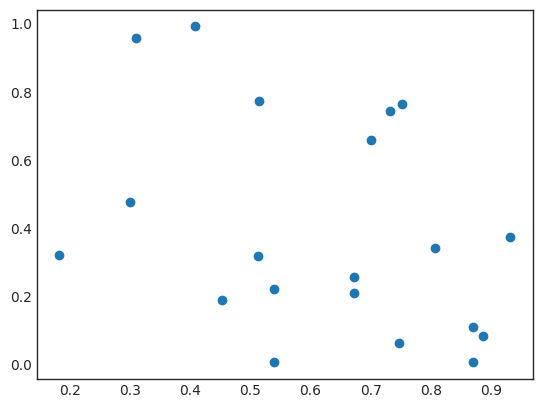

In [ ]:
plt.scatter(X[:,0], X[:,1])

In [ ]:
def kmeans(X, k):
    # init centers
    n = X.shape[0]
    centers = X[np.random.choice(n, k, replace=False)]
    closest = np.zeros(n).astype(int)

    while True:

        old_closest = closest.copy()
        #  update cluster membership
        distances = cdist(X, centers)
        closest = np.argmin(distances, axis=1)


        #  update centers
        for i in range(k):
            centers[i, :] = X[closest == i].mean(axis=0)

        # break if converged
        if all(closest == old_closest):
            break

    return closest, centers

In [ ]:
labels, centers = kmeans(X, 3)
print(labels)
print(centers)

[0 1 0 2 2 1 2 1 1 0 1 2 1 0 2 1 1 0 0 2]
[[0.56944108 0.8141337 ]
 [0.80751961 0.18099668]
 [0.42090709 0.25537674]]


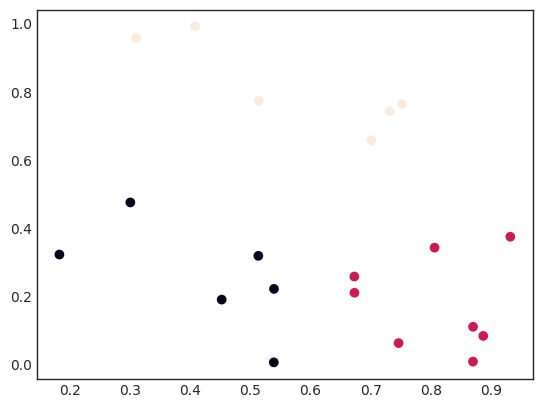

In [ ]:
plt.scatter(X[:,0],X[:,1],c=labels)

# Feature Engineering

In [ ]:
# This is our data in X and the y output to predict
X = ds_fe['data']
y = ds_fe.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# let's standardize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std[0:5])
print("The shape of Feature Matrix is -",X_std.shape)

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
The shape of Feature Matrix is - (150, 4)


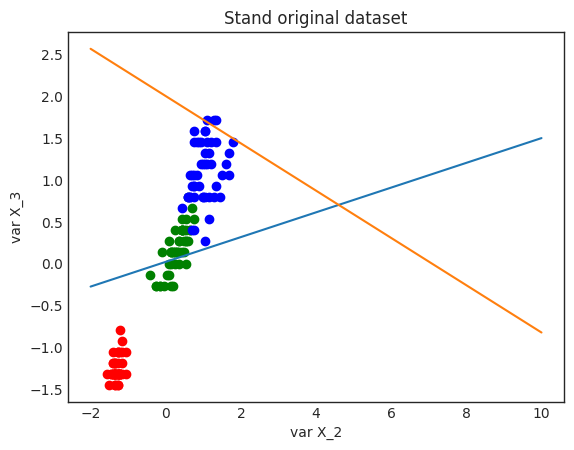

In [ ]:
x_lin = np.linspace(-2,10,100)

# let's have a quick look at graph of the data
var_x1 = 2
var_x2 = 3

# figure, axis = plt.subplots(1, 2)
plt.figure()

y = ds_fe.target
for c, i in zip("rgb", [0, 1,2]):
    plt.scatter(X_std[y==i,var_x1], X_std[y==i,var_x2], c=c)

# illustrate x0 and x1
# plt.plot(x_lin, 2.93808505*x_lin + 0.9201649)
# plt.plot(x_lin, -0.6263704993836036*x_lin +2)

# illustrate x1 and x2
plt.plot(x_lin, 0.14774182*x_lin + 0.02085386)
plt.plot(x_lin, -0.2823013822355782*x_lin +2)

plt.xlabel(f'var X_{var_x1}')
plt.ylabel(f'var X_{var_x2}')
plt.title('Stand original dataset')
plt.show()

In [ ]:
(2 * -0.02085386)/0.14774182

-0.2823013822355782

In [ ]:
X_cov_mat = np.cov(X_std.T)
X_cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
X_corr_mat = np.corrcoef(X_std.T)
X_corr_mat

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(X_cov_mat)
print(f'Eigenvectors \n {eig_vecs}')
print(f'\nEigenvalues \n {eig_vals}')

Eigenvectors 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]


In [ ]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.938085050199995
0.9201649041624864
0.1477418210449475
0.020853862176462696


In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp= np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print(40 * '-')
print("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [72.96244541329989, 22.850761786701753, 3.668921889282865, 0.5178709107154905]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.96244541  95.8132072   99.48212909 100.        ]


In [ ]:
import pprint
print("All Eigen Values along with Eigen Vectors")
pprint.pprint(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(2.938085050199995,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624864,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449475,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462696,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]
----------------------------------------
Matrix W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [ ]:
Y = X_std.dot(matrix_w)

In [ ]:
print(Y[0:5])

[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


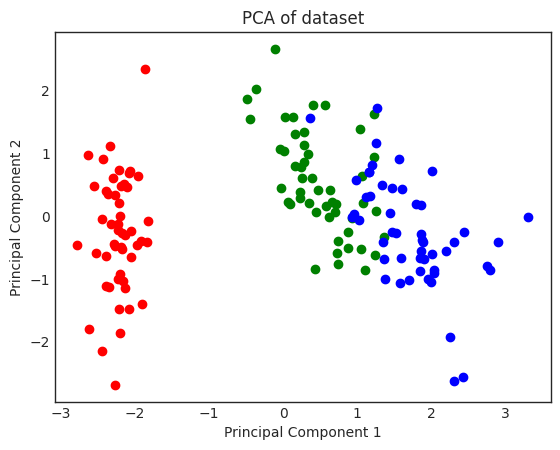

In [ ]:
plt.figure()
# target_names = iris.target_names
y = ds_fe.target
for c, i in zip("rgb", [0, 1,2]):
    plt.scatter(Y[y==i,0], Y[y==i,1], c=c)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of dataset')
plt.show()